# Final Project Guidelines

1. You must submit your code for Python and R (Either jupyter and R markdown or just 2 jupyter notebooks).
2. Put your name as the title of the file AND what type of notebook it is.
3. By running your notebooks, I must be able to reproduce your data files, your graphs, and your regression tables. Graphs, Tables and your final new dataset (CSV) should be exported (when I run the notebook, it should produce new files).
4. You must document your notebook and provide links to resources you used outside of the lecture notes.
5. The goal is to see improvement in your code - you will be graded on the efficiency of your code - both in terms of your use of automating code (such as using efficient for loops or implementing pandas appropriately (not all for loops are efficient)) and brevity (less lines of code to do the same task).
6. You must be able to create all of your work within python and/or R. You can't export a file, do it in excel, and then import it back. (You can import a csv file with external data to then merge with your other collected data).
7. You will be graded on the clarity and organization of your notebooks. You need to integrate Markdown to distinguish separate sections and include a discussion within each section - do not just usin commented out areas (ie #). Commented out areas is reserved for documentation of the code.
8. Make it easy for me to run. When you are pulling in new files to merge, be sure to have a path area for me to put my own path name. This can be done a few ways, but here are some examples:

BE CONSISTENT. Use one option only

One option:

```
cd "set/file/name"
df = read_csv("filname.csv")
```

Another option
```
path = "set/path/name"
df = read_csv(path+"filname.csv")

```





## Your Notebooks should consist of:

Part 1: Webscraped/API - include a broad explanation on how the API/webscrape works. Include evidence from the website or API that help explain this process (the API's documentation, how you figured out the website to webscrape, etc).

Part 2: Data Cleaning - discuss hurdles and specific data issues you faced in cleaning the dataset. 

Part 3: Graphs - include all of your graphs - you should have at least 3 and be sure it can be exported when running the code. Include a description of what your graphs mean and what insights you learned from the graphs. Your graphs must not be reproducing the same data in a different visualization format. You can't have the same information presented in a bar graph and a line graph. Each graph must contain new insights. 

Part 4: Regressions - include the finalized tables and be sure it can be exported. Be sure to include a description about what this means in your exploratory analysis, and what would you like to improve to understand your research question in more depth? 


## Other Considerations:

1. I will be looking for improvements in your code - especially in regards to your API and data cleaning sections.
2. For graphs/regression tables they should be publishable quality - all titles, labels, and legends should be appropriately placed, it should be clearly visible, and variables shouldn't have any underscores or other symbols unless necessary and words should be capitalized as necessary. Overall, I should be able to put your work in a magazine and the editor would be happy.



### Research should be reproducible - documenting and having neat notebooks for others to work from is integral to scientific progress.

# 
# Liam Chentoufi - Final Project
### Thank you, below includes all webscraped data and visualizations. I have pasted two versions, the first has no documentation to hopefully reduce clutter. The fully documented version will be at the very end.

# Necessary Packages

In [16]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import selenium
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.chrome.options import Options

# 
# Setting Paths

In [17]:
path='/Users/liamchentoufi/Desktop/590/presentation-and-final-project-LiamChentoufi/path/'#To save scraped data and cleaned sets
external='/Users/liamchentoufi/Desktop/590/presentation-and-final-project-LiamChentoufi/external/'#The path to the external csv files saved from FRED, these will be pulled in when data cleaning and merging
driver_path=Service('/Users/liamchentoufi/Downloads/chromedriver_mac64/chromedriver')#This is the path to the Chrome driver for Selenium

chrome_options = Options()

# 
# Collecting Data

In [ ]:
driver_path=Service('/Users/liamchentoufi/Downloads/chromedriver_mac64/chromedriver')
chrome_options.add_argument('--window-size=1900,1000')
driver=webdriver.Chrome(service=driver_path, options=chrome_options)


gov='https://www.federalreserve.gov/newsevents/speeches.htm'


data={}    


for page in range(1,51):
    
    try:
        for i in range(1,21):
            driver.get(gov)

            if page>1:
                if page<=9:
                    
                    for pages in range(page-1):
                        driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[11]/a').click()
                       

                if page>9:
                    
                    for pages in range(1,9):
                        driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[11]/a').click()
                        
                            
                    for pages in range(page-9):
                        try:
                            driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[12]/a').click()
                        except:#For only page 50
                            driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[5]/a').click()

                            

            driver.implicitly_wait(10)

            element=driver.find_element(By.XPATH, f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[1]/em/a')
            speaker=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[3]').text
            date=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[1]/time').text
            location=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[4]').text

            try:
                webdriver.ActionChains(driver).move_to_element(element).click(element).perform()



                link=driver.current_url

                text=driver.find_element(By.XPATH, '//*[@id="article"]/div[3]').text
                text=text.split()


                keywordsearch={'inflation':0, 'expectation':0, 'resolve':0, 'optimism':0, 'recession':0, 'employment':0,'unemployment':0, 'wage':0, 'instability':0, 'crisis':0, 'rate':0, 'spread':0, 'easing':0, 'tightening':0, 'uncertainty':0, 'output':0, 'declining':0, 'rising':0, 'concern':0, 'labor':0, 'interest':0}

                for keyword in keywordsearch.keys():
                    for word in text:
                        if keyword in word.lower():
                            keywordsearch[keyword]+=1


                data[str(page)+'_'+str(i)]={'Speaker':speaker, 'Date':date, 'Article_Link':link, 'Location':location, 'Word_Count':len(text), 'Inflation_Mentions':keywordsearch['inflation'], 'Expectation_Mentions':keywordsearch['expectation'], 'Resolve_Mentions':keywordsearch['resolve'], 'Optimism_Mentions':keywordsearch['optimism'], 'Recession_Mentions':keywordsearch['recession'], 'Employment_Mentions':keywordsearch['employment'], 'Unemployment_Mentions':keywordsearch['unemployment'], 'Wage_Mentions':keywordsearch['wage'], 'Instability_Mentions':keywordsearch['instability'],'Crisis_Mentions':keywordsearch['crisis'], 'Rate_Mentions':keywordsearch['rate'], 'Spread_Mentions':keywordsearch['spread'], 'Easing_Mentions':keywordsearch['easing'], 'Tightening_Metions':keywordsearch['tightening'], 'Uncertainty_Mentions':keywordsearch['uncertainty'],'Output_Mentions':keywordsearch['output'], 'Declining_Mentions':keywordsearch['declining'], 'Rising_Mentions':keywordsearch['rising'], 'Concern_Mentions':keywordsearch['concern'], 'Labor_Mentions':keywordsearch['labor'],'Interest_Mentions':keywordsearch['interest']}

            except:
                data[str(page)+'_'+str(i)]={'Speaker':speaker, 'Date':date, 'Article_Link':link, 'Location':location}
    except:
        pass


    
    
    
archive='https://www.federalreserve.gov/newsevents/speech/speeches-archive.htm'
archivepage=51

try:
    for a in range (1,11):
        driver.get(archive)
        time.sleep(.5)
        driver.implicitly_wait(10)
        driver.find_element(By.XPATH, f'//*[@id="article"]/div/div/div/ul/li[{a}]/a').click()

        try: 
            for b in range (1,110):
                page=driver.current_url

                speechinfo=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]').text
                speechinfo=speechinfo.split('\n')

                try:
                    element2=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]/div[1]/a')
                    webdriver.ActionChains(driver).move_to_element(element2).click(element2).perform()

                except:
                    element2=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]/div[2]/a')
                    webdriver.ActionChains(driver).move_to_element(element2).click(element2).perform()

                driver.implicitly_wait(10)

                speech=driver.find_element(By.XPATH, '/html/body').text
                speech=speech.split()

                archivesearch={'inflation':0, 'expectation':0, 'resolve':0, 'optimism':0, 'recession':0, 'employment':0,'unemployment':0, 'wage':0, 'instability':0, 'crisis':0, 'rate':0, 'spread':0, 'easing':0, 'tightening':0, 'uncertainty':0, 'output':0, 'declining':0, 'rising':0, 'concern':0, 'labor':0, 'interest':0}

                for archivekeyword in archivesearch.keys():
                    for archiveword in speech:
                        if archivekeyword in archiveword.lower():
                            archivesearch[archivekeyword]+=1

                archivelink=driver.current_url

                data[str(archivepage)+'_'+str(b)]={'Speaker':speechinfo[2], 'Date':speechinfo[0], 'Article_Link':archivelink, 'Location':speechinfo[3], 'Word_Count':len(speech), 'Inflation_Mentions':archivesearch['inflation'], 'Expectation_Mentions':archivesearch['expectation'], 'Resolve_Mentions':archivesearch['resolve'], 'Optimism_Mentions':archivesearch['optimism'],'Recession_Mentions':archivesearch['recession'],'Employment_Mentions':archivesearch['employment'], 'Unemployment_Mentions':archivesearch['unemployment'],'Wage_Mentions':archivesearch['wage'], 'Instability_Mentions':archivesearch['instability'],'Crisis_Mentions':archivesearch['crisis'], 'Rate_Mentions':archivesearch['rate'], 'Spread_Mentions':archivesearch['spread'], 'Easing_Mentions':archivesearch['easing'], 'Tightening_Metions':archivesearch['tightening'],'Uncertainty_Mentions':archivesearch['uncertainty'],'Output_Mentions':archivesearch['output'], 'Declining_Mentions':archivesearch['declining'], 'Rising_Mentions':archivesearch['rising'], 'Concern_Mentions':archivesearch['concern'], 'Labor_Mentions':archivesearch['labor'],'Interest_Mentions':archivesearch['interest']}


                driver.get(page)

        except:
            archivepage+=1
            time.sleep(.5)
except:
    pass
        
df=pd.DataFrame(data=data)
df=df.transpose()
df.to_csv(path+'speechdata.csv')

time.ctime()

# 
# Cleaning Data

In [18]:
effr=pd.read_csv(external+'EFFR.csv')
effr['DATE']=pd.to_datetime(effr['DATE'])

pce=pd.read_csv(external+'PCEPI.csv')
pce['DATE']=pd.to_datetime(pce['DATE'])

reserves=pd.read_csv(external+'BOGMBBM.csv')
reserves['DATE']=pd.to_datetime(reserves['DATE'])


speech=pd.read_csv(path+'speechdata.csv')
speech['Date']=pd.to_datetime(speech['Date'])


speech=speech.drop(columns=['Unnamed: 0','Speaker','Article_Link','Location','Word_Count']).rename(columns={'Tightening_Metions':'Tightening_Mentions'})


words=['Inflation','Expectation','Resolve','Optimism','Recession','Employment','Unemployment','Wage','Instability','Crisis','Rate','Spread','Easing','Tightening','Uncertainty','Output','Declining','Rising','Concern','Labor','Interest']
for w in words:
    speech[str(w)+'_Related']=(speech[str(w)+'_Mentions']>5).astype('int')
    speech=speech.drop(columns=[str(w)+'_Mentions'])

speech=pd.merge(effr, speech, left_on='DATE', right_on='Date', how='right').dropna().drop(columns=['DATE'])


speech['Total']=1
speech['Day']=1
speech['Month']=speech['Date'].dt.month
speech['Year']=speech['Date'].dt.year

speech=speech[speech['EFFR'] != '.']
speech['EFFR']=speech['EFFR'].astype('float')


speech=speech.groupby(['Month','Day','Year'],as_index=False).agg({'EFFR':'mean','Inflation_Related':'sum','Expectation_Related':'sum','Resolve_Related':'sum','Optimism_Related':'sum','Recession_Related':'sum','Employment_Related':'sum','Unemployment_Related':'sum','Wage_Related':'sum','Instability_Related':'sum','Crisis_Related':'sum','Rate_Related':'sum','Spread_Related':'sum','Easing_Related':'sum','Tightening_Related':'sum','Uncertainty_Related':'sum','Output_Related':'sum','Declining_Related':'sum','Rising_Related':'sum','Concern_Related':'sum','Labor_Related':'sum','Interest_Related':'sum','Total':'sum'})

speech['Date']=pd.to_datetime(dict(year=speech['Year'], day=speech['Day'], month=speech['Month']))



speech=pd.merge(pce, speech, left_on='DATE', right_on='Date', how='right').drop(columns=['DATE']).rename(columns={'PCEPI_PC1':'PCE_YOY'})

speech=pd.merge(reserves, speech, left_on='DATE', right_on='Date', how='right').drop(columns=['DATE']).rename(columns={'BOGMBBM':'Reserves'})


speech=speech[['Reserves','PCE_YOY','EFFR','Month','Day','Year','Date','Total','Inflation_Related','Expectation_Related','Resolve_Related','Optimism_Related','Recession_Related','Employment_Related','Unemployment_Related','Wage_Related','Instability_Related','Crisis_Related','Rate_Related','Spread_Related','Easing_Related','Tightening_Related','Uncertainty_Related','Output_Related','Declining_Related','Rising_Related','Concern_Related','Labor_Related','Interest_Related']].sort_values(by='Date',ascending=False).reset_index().drop(columns=['index'])
speech=speech[~(speech['Date']<'2001-01-01')]

for m in words:
    speech[str(m)+'_Share']=speech[str(m)+'_Related']/speech['Total']


speech.to_csv(path+'speechfinal.csv')

speech

,Reserves,PCE_YOY,EFFR,Month,Day,Year,Date,Total,Inflation_Related,Expectation_Related,...,Spread_Share,Easing_Share,Tightening_Share,Uncertainty_Share,Output_Share,Declining_Share,Rising_Share,Concern_Share,Labor_Share,Interest_Share
0,NaN,NaN,4.830000,4,1,2023,2023-04-01,7,2,1,...,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.285714,0.142857
1,3258400.0,4.16416,4.701250,3,1,2023,2023-03-01,8,4,3,...,0.0,0.000000,0.125000,0.0,0.125000,0.0,0.0,0.000000,0.250000,0.250000
2,3021800.0,5.07497,4.578750,2,1,2023,2023-02-01,8,4,2,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.250000,0.125000
3,3029900.0,5.38131,4.330000,1,1,2023,2023-01-01,5,4,2,...,0.0,0.000000,0.200000,0.0,0.000000,0.0,0.0,0.000000,0.800000,0.200000
4,3107300.0,5.30120,3.830000,12,1,2022,2022-12-01,1,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,14500.0,2.55675,4.126250,5,1,2001,2001-05-01,8,3,2,...,0.0,0.125000,0.125000,0.0,0.125000,0.0,0.0,0.000000,0.125000,0.375000
255,13700.0,2.37354,4.720000,4,1,2001,2001-04-01,7,1,1,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.142857,0.000000,0.285714
256,13800.0,2.10919,5.298333,3,1,2001,2001-03-01,6,1,1,...,0.0,0.166667,0.000000,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.333333
257,13500.0,2.53933,5.532500,2,1,2001,2001-02-01,4,1,0,...,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,0.000000,0.250000,0.250000


# 
# Data Visualization

In [19]:
final=pd.read_csv(path+'speechfinal.csv')
final=final.sort_values(by='Date',ascending=True).drop(columns=['Unnamed: 0'])

## First Plot

<Figure size 640x480 with 0 Axes>

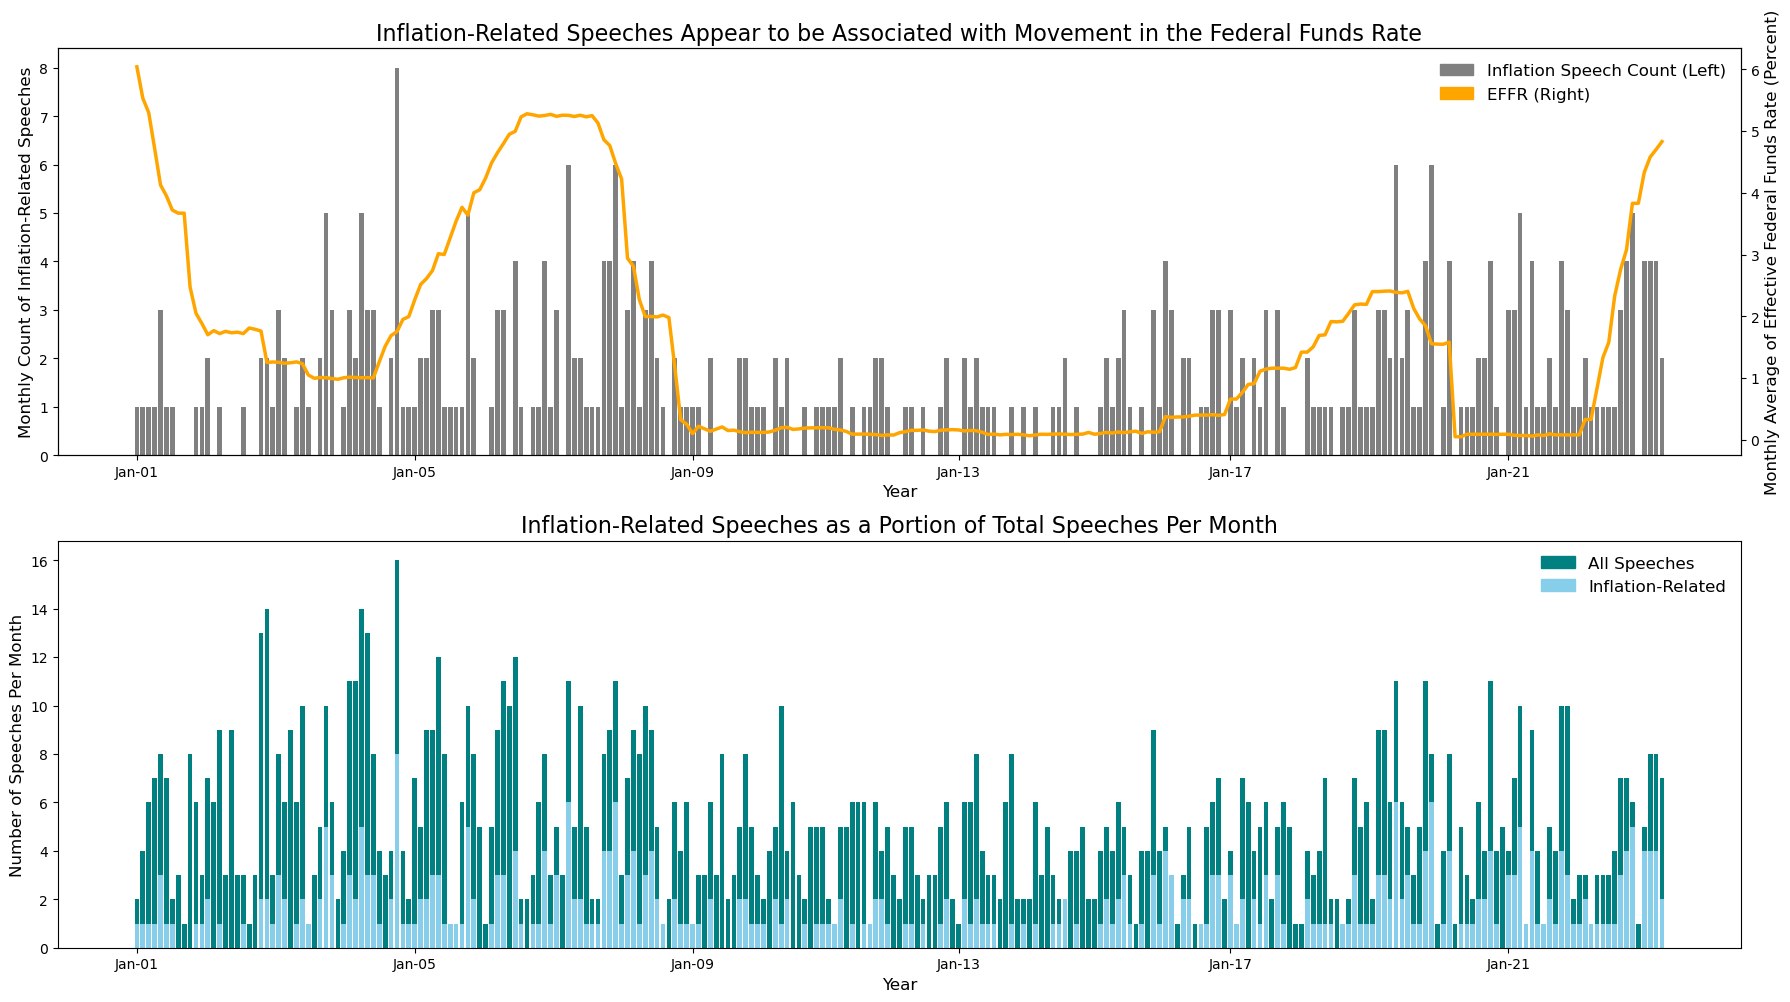

In [20]:
fig=plt.figure()
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(18,10))


ax1=plt.subplot(2,1,1)
ax1.bar(final['Date'],final['Inflation_Related'],color='grey')

ax2=ax1.twinx()
ax2.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)

ax1.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])

ax1.set_ylabel('Monthly Count of Inflation-Related Speeches', fontsize=12)
ax2.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)
ax1.set_title('Inflation-Related Speeches Appear to be Associated with Movement in the Federal Funds Rate', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)

inflationspeech=mpatches.Patch(color='grey', label='Inflation Speech Count (Left)')
effr=mpatches.Patch(color='orange', label='EFFR (Right)')
plt.legend(handles=[inflationspeech,effr], frameon=False, fontsize=12)

ax3=plt.subplot(2,1,2)
ax3.bar(final['Date'],final['Total'],color='teal')
ax3.bar(final['Date'],final['Inflation_Related'],color='skyblue')

ax3.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])

ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Number of Speeches Per Month', fontsize=12)
ax3.set_title('Inflation-Related Speeches as a Portion of Total Speeches Per Month', fontsize=16)

fig.tight_layout()

total=mpatches.Patch(color='teal', label='All Speeches')
inflation=mpatches.Patch(color='skyblue', label='Inflation-Related')
plt.legend(handles=[total,inflation], frameon=False, fontsize=12)

plt.savefig(path+'firstfig.png', dpi=300)

## Second Plot

<Figure size 640x480 with 0 Axes>

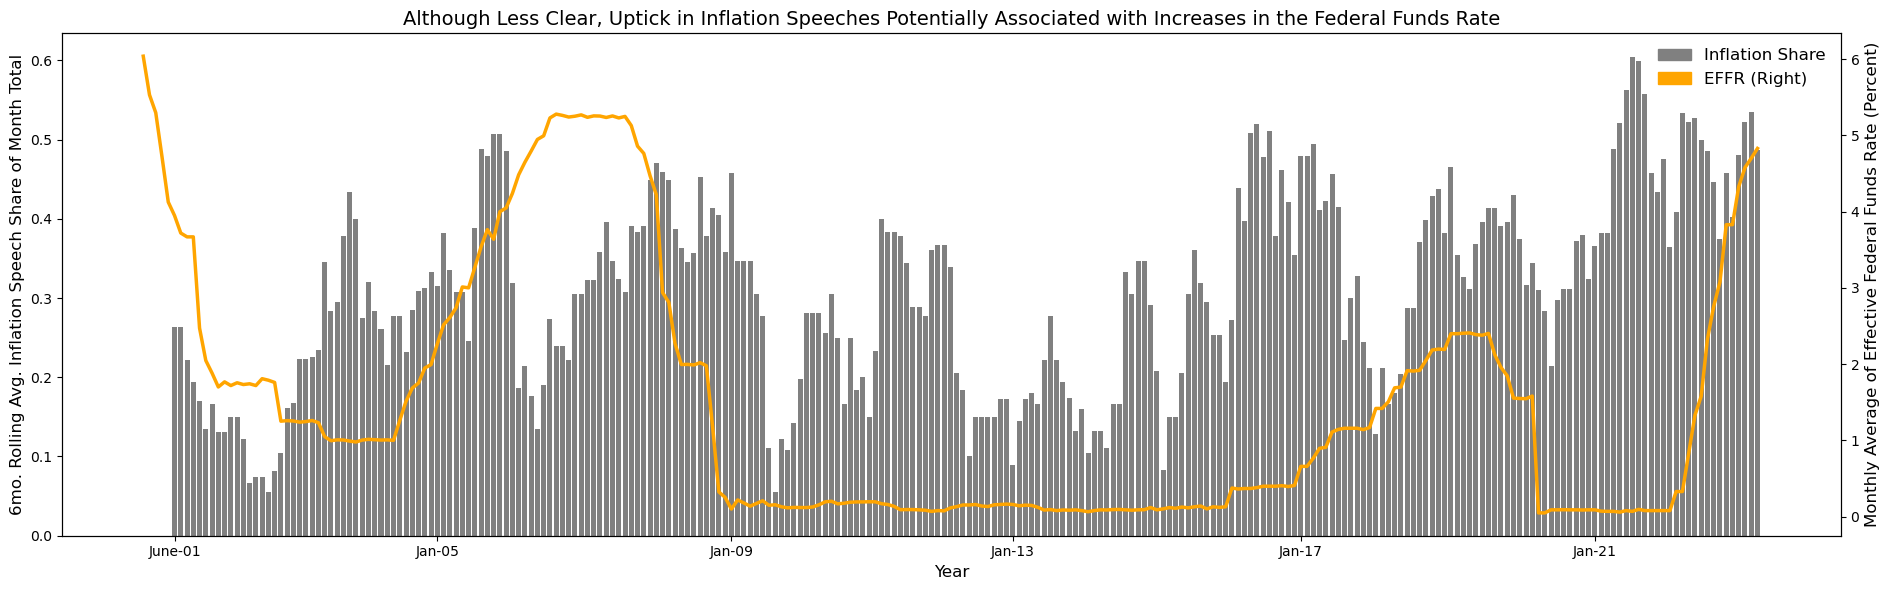

In [21]:
fig=plt.figure()
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(19,6))

final['InflationShare_Average']=final.rolling(window=6)['Inflation_Share'].mean()

ax4=plt.subplot(1,1,1)
ax4.bar(final['Date'],final['InflationShare_Average'],color='grey')

ax5=ax4.twinx()
ax5.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)

ax4.set_xticks(['2001-06-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['June-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])

ax4.set_ylabel('6mo. Rolling Avg. Inflation Speech Share of Month Total', fontsize=12)
ax5.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)
ax4.set_title('Although Less Clear, Uptick in Inflation Speeches Potentially Associated with Increases in the Federal Funds Rate', fontsize=14)
ax4.set_xlabel('Year', fontsize=12)

fig.tight_layout()

inflationshare=mpatches.Patch(color='grey', label='Inflation Share')
effr=mpatches.Patch(color='orange', label='EFFR (Right)')
plt.legend(handles=[inflationshare,effr], frameon=False, fontsize=12)

plt.savefig(path+'secondfig.png', dpi=300)

## Third Plot

<Figure size 640x480 with 0 Axes>

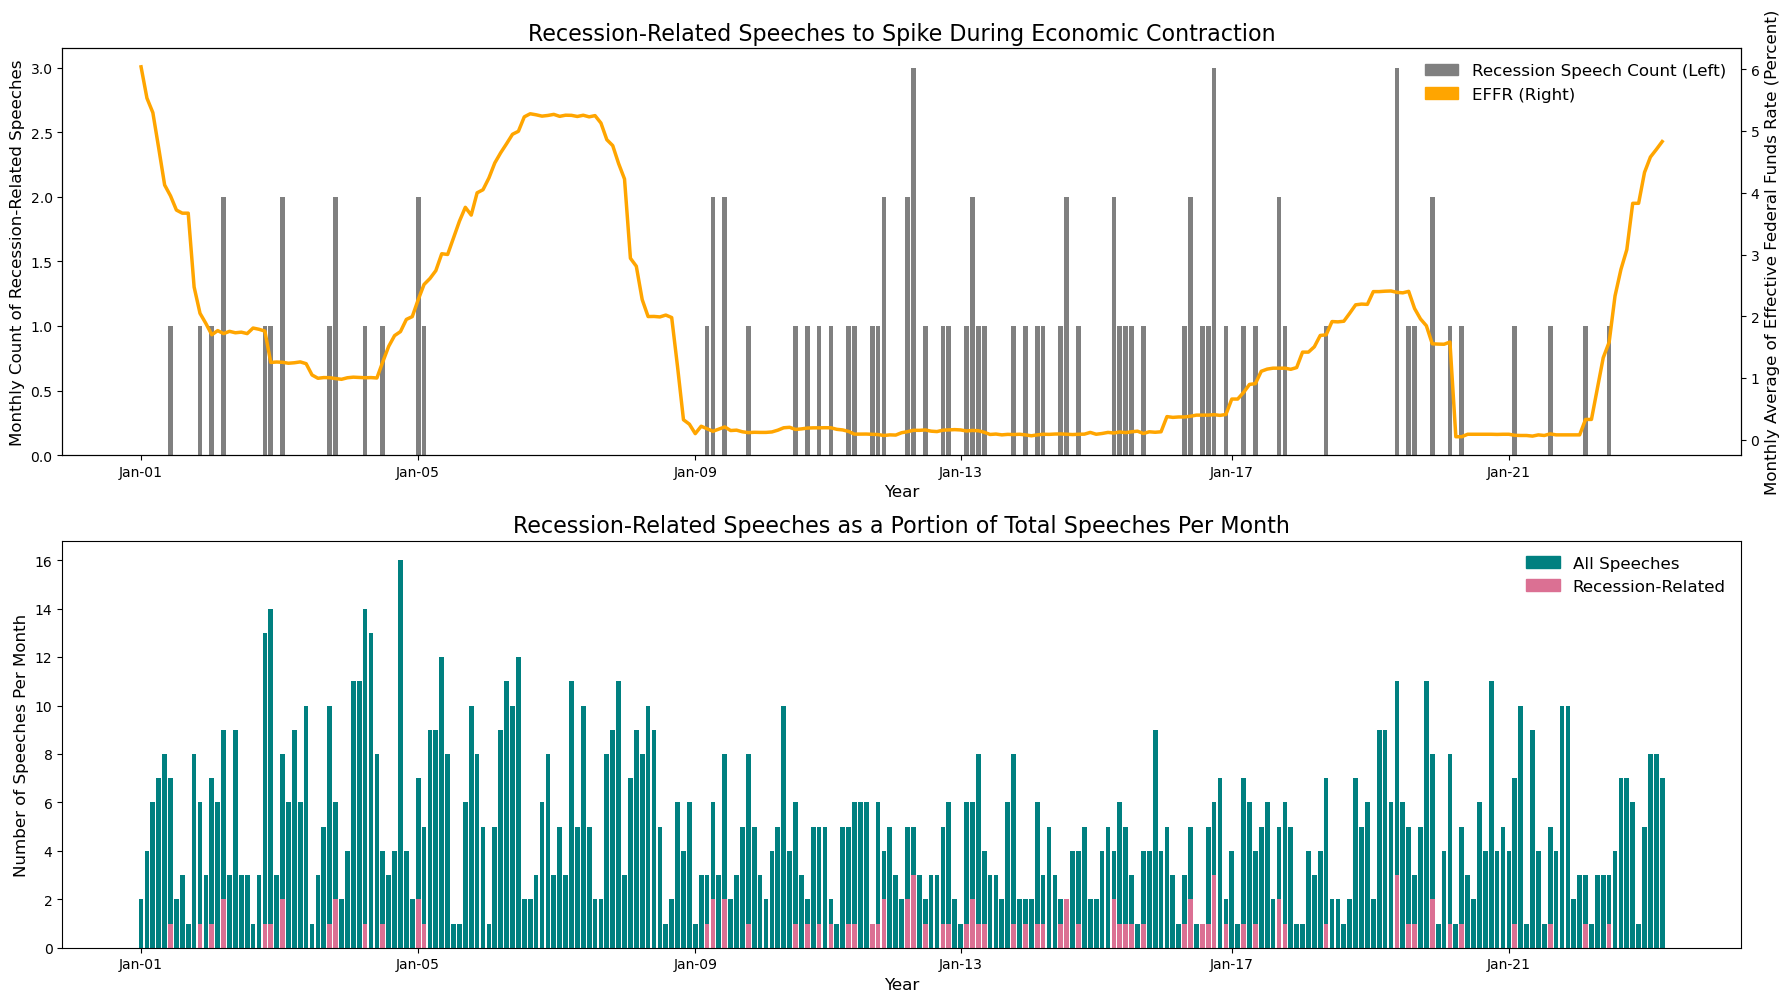

In [22]:
fig=plt.figure()
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(18,10))


ax1=plt.subplot(2,1,1)
ax1.bar(final['Date'],final['Recession_Related'],color='grey')

ax2=ax1.twinx()
ax2.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)

ax1.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])

ax1.set_ylabel('Monthly Count of Recession-Related Speeches', fontsize=12)
ax2.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)
ax1.set_title('Recession-Related Speeches to Spike During Economic Contraction', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)

inflationspeech=mpatches.Patch(color='grey', label='Recession Speech Count (Left)')
effr=mpatches.Patch(color='orange', label='EFFR (Right)')
plt.legend(handles=[inflationspeech,effr], frameon=False, fontsize=12)

ax3=plt.subplot(2,1,2)
ax3.bar(final['Date'],final['Total'],color='teal')
ax3.bar(final['Date'],final['Recession_Related'],color='palevioletred')

ax3.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])

ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Number of Speeches Per Month', fontsize=12)
ax3.set_title('Recession-Related Speeches as a Portion of Total Speeches Per Month', fontsize=16)


total=mpatches.Patch(color='teal', label='All Speeches')
recession=mpatches.Patch(color='palevioletred', label='Recession-Related')
plt.legend(handles=[total,recession], frameon=False, fontsize=12)


fig.tight_layout()

plt.savefig(path+'thirdfig.png', dpi=300)

<Figure size 640x480 with 0 Axes>

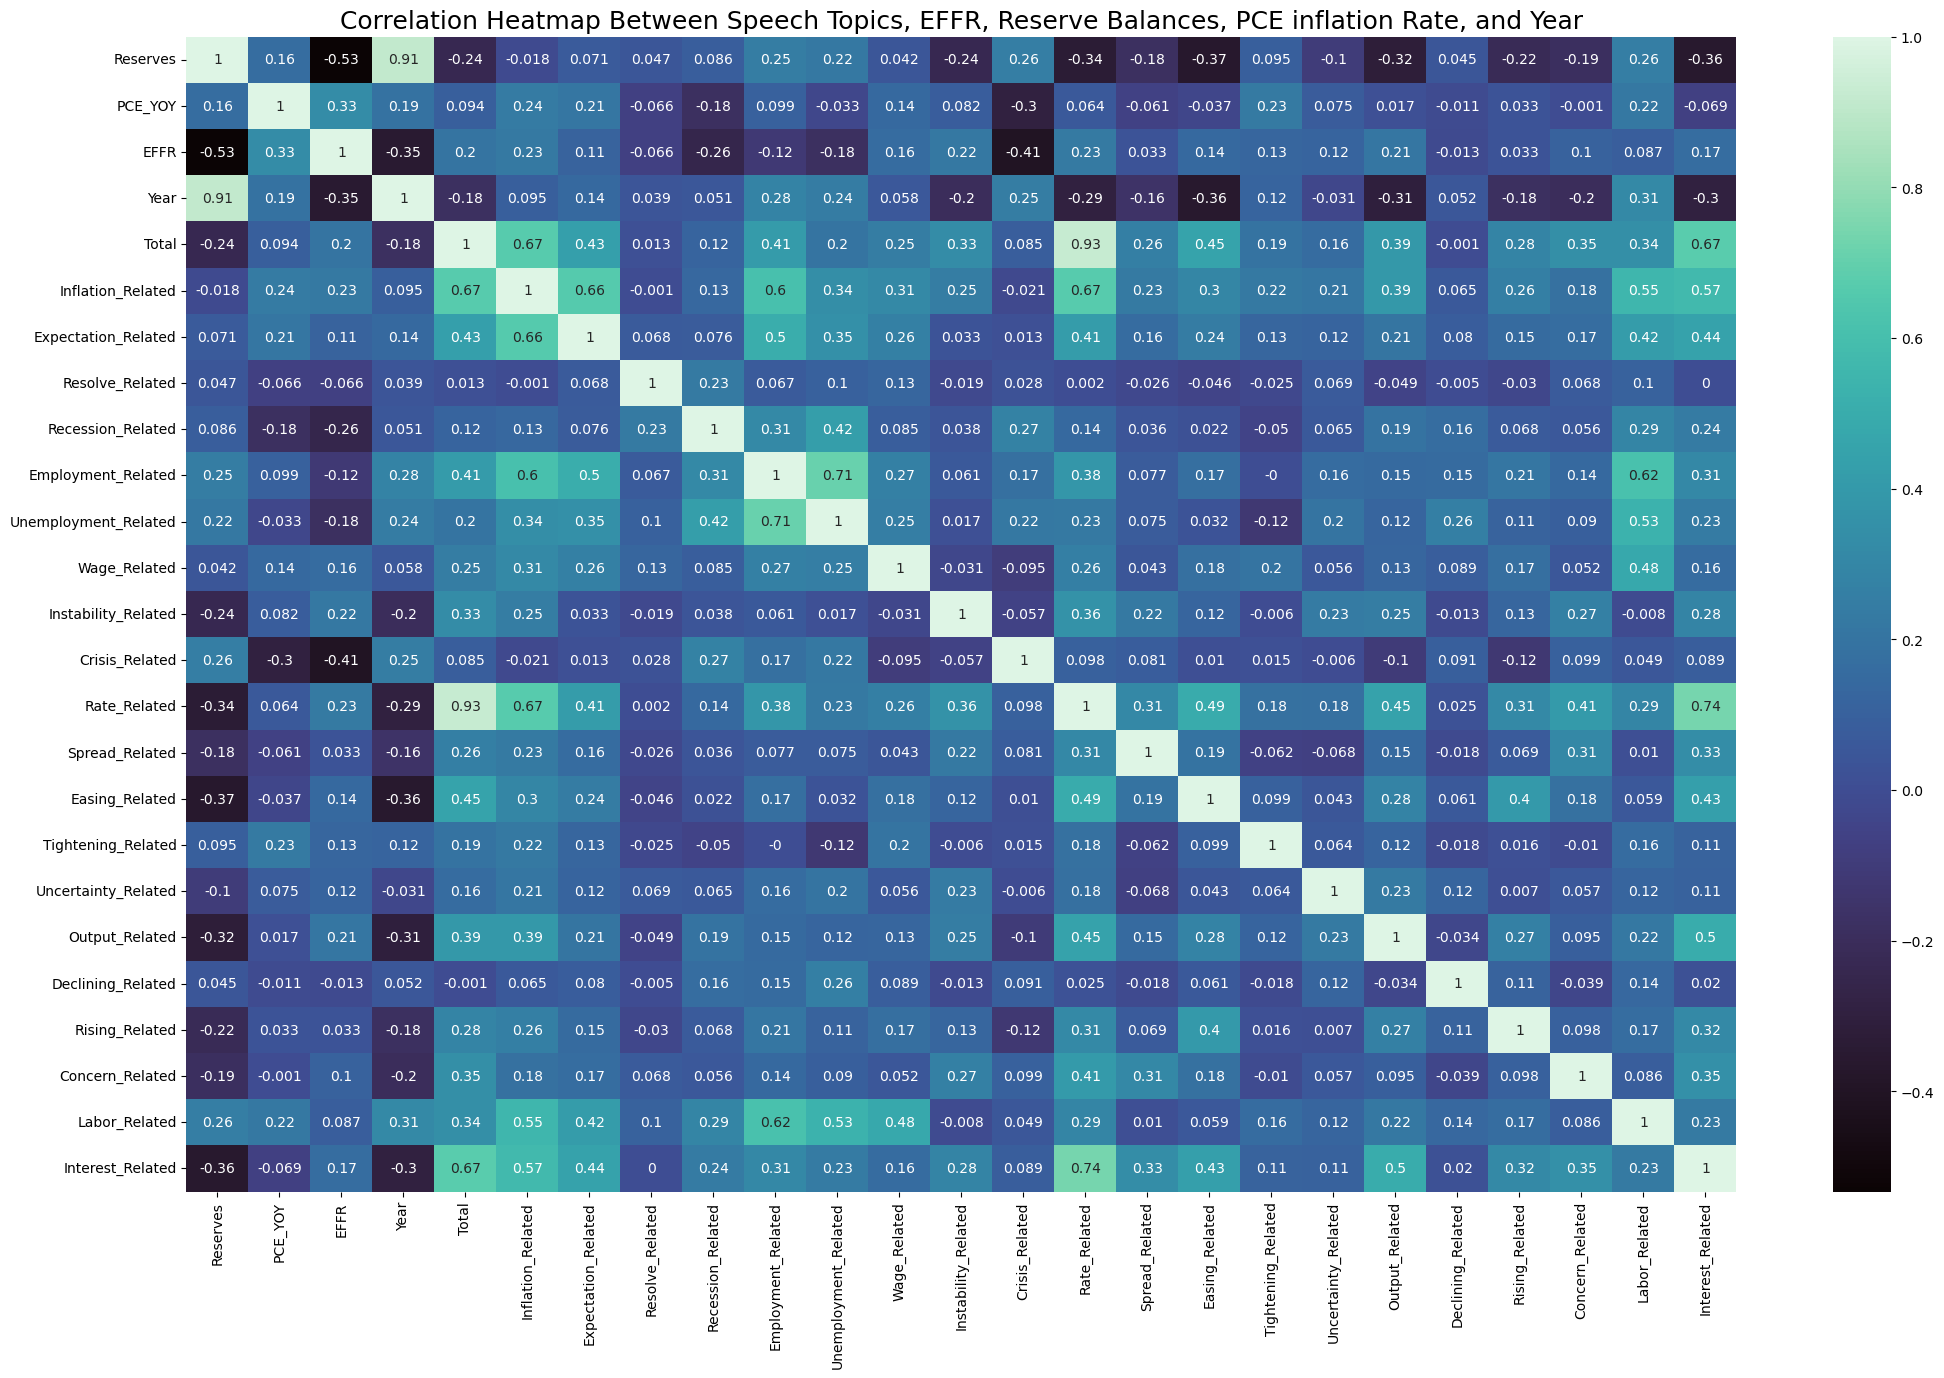

In [23]:
heat=pd.read_csv(path+'speechfinal.csv')

heat=heat.drop(columns=['Unnamed: 0','Day','Month','Optimism_Related','Inflation_Share','Expectation_Share','Resolve_Share','Optimism_Share','Recession_Share','Employment_Share','Unemployment_Share','Wage_Share','Instability_Share','Crisis_Share','Rate_Share','Spread_Share','Easing_Share','Tightening_Share','Uncertainty_Share','Output_Share','Declining_Share','Rising_Share','Concern_Share','Labor_Share','Interest_Share'])

fig=plt.figure()
fig, ax=plt.subplots(figsize=(25,15))

correlation=sns.heatmap(round(heat.corr(),3), annot=True, cmap='mako')

correlation.set_title('Correlation Heatmap Between Speech Topics, EFFR, Reserve Balances, PCE inflation Rate, and Year', fontsize=18)

correlation.figure.savefig(path+'heatmap.png',dpi=300)

# 
# 
# Fully Documented Version

# Packages (Documented)

In [24]:
#Below are the necessary packages

import time#To use as a rate limiter
import pandas as pd#To clean and manipulate data
import numpy as np#Numpy will be imported, in the event we need to use any of its functions
import matplotlib.pyplot as plt#To plot graphs
import matplotlib.patches as mpatches#To manually create graph legends
import seaborn as sns#Seaborn will be imported for additional plots, more specifically the correlation heatmap

import selenium#Our primary package for webscraping
from selenium import webdriver#Below are all functions of Selenium we will need to refer to later such as "By" when
                              #finding elements based off XPATH
    
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.chrome.options import Options

# 
# Setting Paths (Documented)

In [25]:
path='/Users/liamchentoufi/Desktop/590/presentation-and-final-project-LiamChentoufi/path/'#To save scraped data and cleaned sets
external='/Users/liamchentoufi/Desktop/590/presentation-and-final-project-LiamChentoufi/external/'#The path to the external csv files saved from FRED, these will be pulled in when data cleaning and merging
driver_path=Service('/Users/liamchentoufi/Downloads/chromedriver_mac64/chromedriver')#This is the path to the Chrome driver for Selenium

chrome_options = Options()#Reassign the Selenium function to a new variable name

# 
# Collecting Data (Documented)

In [ ]:
driver_path=Service('/Users/liamchentoufi/Downloads/chromedriver_mac64/chromedriver')#This will open the Chrome Driver, it is needed before every chunk of webscraping code
chrome_options.add_argument('--window-size=1900,1000')
driver=webdriver.Chrome(service=driver_path, options=chrome_options)


gov='https://www.federalreserve.gov/newsevents/speeches.htm'#This is the primary site we will be scraping from, it is initialized for easy access


data={}#Initialize empty dictionary to save data    


for page in range(1,51):#This outerloop will loop for the number of pages we need to scrape. In this case, federalreserve.gov
                        #has 49 speech pages with an archive on a separate site
    
    try:#As the last page has less than 20 speeches we will run into error if we try to call out a speech with an XPATH that
        #does not match. This ensures we just pass to the archive portion.
        
        for i in range(1,21):#This inner loop will loop for all of the links to speeches within a given page. As there
                             #are 20 speeches per page, we will set the range from 1 to 21, 21 not included
            
            driver.get(gov)#This Selenium function opens the url stored in "gov" in our Chrome driver window
           

            if page>1:#This will ensure we do not begin flipping through the site pages until we have finished page 1's speeches
                
                if page<=9:#This method is a bit repetitive, but I opted for this solution as the federalreserve.gov's
                           #web page does not change the url as the page number changes. I was hoping to paginate 
                           #by querying the url with page=2 or something similar, but the link stays the same for each page. Instead
                           #these loops will press the "Next" page button for the number of times needed in order to reach the
                           #page number our outer loop is on, until all pages have been scraped
                            
                    
                    for pages in range(page-1):#This condition is specifically for if we are paginating through pages 1-9. These
                                               #pages have a different XPATH for the "Next" button as on the following pages, its
                                               #placement changes slightly
                                
                        driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[11]/a').click()#Selenium will find the "Next" button's location and click it for the number of
                                                                                                   #times that corresponds with the outer loop's page number
                       

                if page>9:#This was needed because the "li" portion of the XPATH changes as the page bar at the end of the page
                          #extends once page 9 is passed. First we need to cycle through 9 pages using the XPATH "//*[@id="article"]/ul[1]/li[11]/a",
                          #then for the remainder of the pages, we click the "Next" button which is now located at
                          #the XPATH, "//*[@id="article"]/ul[1]/li[12]/a". I had to do some searching, but learned that "li" indicates
                          #the location of the element on the page, https://devhints.io/xpath. This makes sense as after page 9 a new
                          #button appears to the left of "Next", pushing its location one space over
                    
                    for pages in range(1,9):
                        driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[11]/a').click()#This will click the "Next" button
                                                                                                  #8 times until we are on page 9
                  
                            
                    for pages in range(page-9):
                        try:
                            driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[12]/a').click()#For the remainder of the pages, this XPATH will be clicked
                        except:#For only page 50
                            driver.find_element(By.XPATH, '//*[@id="article"]/ul[1]/li[5]/a').click()#If the above XPATH is not located, as would happen on the 50th page, this XPATH will be instead clicked

                            

            driver.implicitly_wait(10)#Waits for speech to load

            element=driver.find_element(By.XPATH, f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[1]/em/a')#This locates the article link by its XPATH. All XPATHs were found by using inspect element and copying th XPATH associated with the HTML node
            speaker=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[3]').text#Since this element is not a link, we just want the text so I must add ".text" after finding it on the page. This specific code will find the speaker who gave the speech, all found before we have clicked into the actual text
            date=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[1]/time').text#This portion will find the value that holds the date the speech was given
            location=driver.find_element(By.XPATH,f'//*[@id="article"]/div[1]/div[{i}]/div[2]/p[4]').text#This will find the location in which the speech was given. All of these variables are listed consecutively on the federalreserve.gov/speeches page in a list of speeches

            try:#I included the try because in some cases, the XPATH can't be found, or it leads to a page that doesn't hold the speech in very specific instances. I need to resolve this, this solution ensures the script does not end once such an error is encountered. Instead the speech is skipped for now, and we move to the next speech's info
                
                webdriver.ActionChains(driver).move_to_element(element).click(element).perform()#This will click the link found under the XPATH stored in the "element" variable. There is a more concise version, I could do "driver.find_element(By.XPATH, '<element>').click()", but I chose to use this as I often ran into the error in which the element couldn't be found on the page. In this case, this error appears to be mitigated, I assume because we are telling Selenium to move to the element until it is in view and only then to click through



                link=driver.current_url#Selenium will grab the page URL we are currently on through "driver.current_url". I will save this as a variable so we can have easy access to the speech

                text=driver.find_element(By.XPATH, '//*[@id="article"]/div[3]').text
                text=text.split()#This navigates to the speech portion on the page by it's XPATH. Once found, it will split
                                 #the text so we have a list with each word separated by commas. This is helpful as we can
                                 #now easily cycle through each word using a for loop to see if it matches any of out chosen keywords



                keywordsearch={'inflation':0, 'expectation':0, 'resolve':0, 'optimism':0, 'recession':0, 'employment':0,'unemployment':0, 'wage':0, 'instability':0, 'crisis':0, 'rate':0, 'spread':0, 'easing':0, 'tightening':0, 'uncertainty':0, 'output':0, 'declining':0, 'rising':0, 'concern':0, 'labor':0, 'interest':0}
                #This dictionary will save all count of mentions information for each keyword
                
                for keyword in keywordsearch.keys():#Iterate through the dictionary for each keyowrd
                    for word in text:#Iterate through each word of speech
                        if keyword in word.lower():
                            keywordsearch[keyword]+=1#If the keyword matches the speech's word in any way, this keyword's mentions will go up by 1 and be stored


                data[str(page)+'_'+str(i)]={'Speaker':speaker, 'Date':date, 'Article_Link':link, 'Location':location, 'Word_Count':len(text), 'Inflation_Mentions':keywordsearch['inflation'], 'Expectation_Mentions':keywordsearch['expectation'], 'Resolve_Mentions':keywordsearch['resolve'], 'Optimism_Mentions':keywordsearch['optimism'], 'Recession_Mentions':keywordsearch['recession'], 'Employment_Mentions':keywordsearch['employment'], 'Unemployment_Mentions':keywordsearch['unemployment'], 'Wage_Mentions':keywordsearch['wage'], 'Instability_Mentions':keywordsearch['instability'],'Crisis_Mentions':keywordsearch['crisis'], 'Rate_Mentions':keywordsearch['rate'], 'Spread_Mentions':keywordsearch['spread'], 'Easing_Mentions':keywordsearch['easing'], 'Tightening_Metions':keywordsearch['tightening'], 'Uncertainty_Mentions':keywordsearch['uncertainty'],'Output_Mentions':keywordsearch['output'], 'Declining_Mentions':keywordsearch['declining'], 'Rising_Mentions':keywordsearch['rising'], 'Concern_Mentions':keywordsearch['concern'], 'Labor_Mentions':keywordsearch['labor'],'Interest_Mentions':keywordsearch['interest']}
                #After all functions have been applied, a new key in the "data" dictionary will be created under the name with the article's page number then its speech number on its respective page. I hope this can act as an ID for each speech. This way, it is easier to revisit them if we need to in the future.
                #The program will wait for .1 seconds as this is the end of an outer loop iteration, I wanted to space them out slightly
            
            except:
                data[str(page)+'_'+str(i)]={'Speaker':speaker, 'Date':date, 'Article_Link':link, 'Location':location}
                #This is here in the case we had an error clicking into a certain speech's link. We still are able to store info regarding the speaker, date, link, and location as this info is stored on the main page
                #This way we will also know which speeches were missed, they will be recorded but not have any data on keywords. This only occurs for certain speeches, I still must resolve this as we are missing data if this except function activates
    
    
    except:
        pass#Since the last page has less than 20 speeches, the for loop will eventually run into an error. This except clause will just ensure we move on to the next portion of the script, which scrapes the Fed's archived speeches


    
    
    
archive='https://www.federalreserve.gov/newsevents/speech/speeches-archive.htm'#A new URL is needed to be saved as the archived speeches are not saved under the Fed's main page, the format of the speech pages are also slightly different. A new program was needed
archivepage=51#I wanted to continue naming the dictionary ID in the same format, so I continued the archvie speeches as if they were additional pages under the original federalreserve.gov/speeches site. Page 51 and onwards refers to archived speeches before 2006

try:
    for a in range (1,11):#This site has 10 pages, so the loop will run from 1 to 11, not including 11.
        driver.get(archive)#This will open the archived speeches website sasved under the "archive" variable
        time.sleep(.5)
        driver.implicitly_wait(10)#Selenium will wait ten seconds or until the page is fully loaded before moving forward
        driver.find_element(By.XPATH, f'//*[@id="article"]/div/div/div/ul/li[{a}]/a').click()#Selenium will find the XPATH that corresponds to the year the outer loop is on. The webpage is formatted in a way where each link corresponds to a year. The only component in the XPATH that changes year to year is
                                                                                             #the "li" portion within the html node. We can cycle through these links by filling in the "li" portion with the placeholder "a" which will save the link we are currently scraping through. It will begin with year 2005,
                                                                                             #and navigate to the XPATH that corresponds to the 2005 link. The "li" value will be "1" for the first link. Next loop, "a" will be "2" and we will click the link that corresponds to the year 2006 and its archived speeches
    

        try:#This try function is neccessary due to the way I created the for loop. Since I do not know the number of speeches per page, I will run through the page and grab the XPATHs until one with a "li" value of a certain number stored in the placeholder "b" doesn't exist. This will cause an error, but it will ensure
            #we have iterated through all speeches on the site and move to the except function, passing through to the next year of speeches
        
            for b in range (1,110):#This archive website is formatted slightly different than the main federalreserve.gov. It does not have a fixed number of speeches per page. Each page includes all speeches for that year, whereas with the current site, speeches are limited to 20 per page no matter the year. I know the max number of
                                   #speeches on any year's page is 102 after checking through them. I set the range to 110 to be safe to ensure no speeches are missed. This loop will run until a speech cannot be located by its XPATH, in which case we have likely run through and scraped all speeches on the page. The except clause will activate
                                   #and Python will be able to move to scraping the next year's page
                    
                page=driver.current_url#This uses Selenium's driver.current_url to grab the url of the page we are currently on. I wanted to grab this as we can later return to this main speech page, after we click through each individual speech link. We will be able to click on each speech, scrape the information we need and then return to the
                                       #main page to continue on to the next speech using the same process. This repeats until all speeches have been tested


                speechinfo=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]').text#This grabs the entire node by XPATH. Selenium will grab this HTML node before clicking into the actual speech. The node contains information on the date the speech was given, its speaker, and the location the speech was given  
                speechinfo=speechinfo.split('\n')#The scraped node is a list with items separated by "\n", by using the split() function, we are able to create a list where each index corresponds to a specific piece of data we may like to save such as date, location and speaker

                try:#I added this try and except clause because I noticed with certain speeches, their XPATH's "div[]" portion changes slightly even while on the same page. Some have div[1] while others have div[2]. I originally ran into an error when an XPATH could not be located due to this. By adding the try and except, Python will first test
                    #to see if the XPATH has the format with div[1]. If it does, Selenium will move to the element on the page and click it, this is the speech link, allwoing us to click in and scrape speech info such as keywords mentioned
                    
                    element2=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]/div[1]/a')
                    webdriver.ActionChains(driver).move_to_element(element2).click(element2).perform()

                except:#If the element with the div[1] format couldn't be located, Selenium will test to see ig it can be located using the div[2] XPATH format. This way, no matter the format of the XPATH we will be able to click through to the speeches. ALthrough, I have noticed the try and except slows down the code when the try clause is not fulfilled, prior to moving to the except clause
                    
                    element2=driver.find_element(By.XPATH, f'//*[@id="speechIndex"]/li[{b}]/div[2]/a')
                    webdriver.ActionChains(driver).move_to_element(element2).click(element2).perform()#This will click through to the speech, but by using this XPATH as opposed to the earlier one included in the try clause

                driver.implicitly_wait(10)#Once on the speech page, I wanted the program to wait until the speech was fully loaded

                speech=driver.find_element(By.XPATH, '/html/body').text#This XPATH leads to the main chunk of the webpage that includes the speech text. Selenium will grab all of the speech's text and split it so each word is separated by a comma and saved into a list. Once in list format, we can run this info through a for loop and test if certain keywords are in the text by looping through, word by word
                                                                        #The split() function will transform this string of text into a list where words are separated by commas 

                speech=speech.split()

                archivesearch={'inflation':0, 'expectation':0, 'resolve':0, 'optimism':0, 'recession':0, 'employment':0,'unemployment':0, 'wage':0, 'instability':0, 'crisis':0, 'rate':0, 'spread':0, 'easing':0, 'tightening':0, 'uncertainty':0, 'output':0, 'declining':0, 'rising':0, 'concern':0, 'labor':0, 'interest':0}
                #Similar to above, all keyword mentions will be saved in each keyword's value portion of the dictionary
                
                for archivekeyword in archivesearch.keys():#Iterate through all keywords in the dictionary
                    for archiveword in speech:#Iterate through each word of the speech, word by word
                        if archivekeyword in archiveword.lower():#If the keyword is within the word of the speech this for loop is sitting on, the keyowrds mentions will be increased by 1.
                            archivesearch[archivekeyword]+=1

                archivelink=driver.current_url#This will use Selenium's driver.current_url function to grab the url of the speech page, so it can be saved to our data dictionary

                data[str(archivepage)+'_'+str(b)]={'Speaker':speechinfo[2], 'Date':speechinfo[0], 'Article_Link':archivelink, 'Location':speechinfo[3], 'Word_Count':len(speech), 'Inflation_Mentions':archivesearch['inflation'], 'Expectation_Mentions':archivesearch['expectation'], 'Resolve_Mentions':archivesearch['resolve'], 'Optimism_Mentions':archivesearch['optimism'],'Recession_Mentions':archivesearch['recession'],'Employment_Mentions':archivesearch['employment'], 'Unemployment_Mentions':archivesearch['unemployment'],'Wage_Mentions':archivesearch['wage'], 'Instability_Mentions':archivesearch['instability'],'Crisis_Mentions':archivesearch['crisis'], 'Rate_Mentions':archivesearch['rate'], 'Spread_Mentions':archivesearch['spread'], 'Easing_Mentions':archivesearch['easing'], 'Tightening_Metions':archivesearch['tightening'],'Uncertainty_Mentions':archivesearch['uncertainty'],'Output_Mentions':archivesearch['output'], 'Declining_Mentions':archivesearch['declining'], 'Rising_Mentions':archivesearch['rising'], 'Concern_Mentions':archivesearch['concern'], 'Labor_Mentions':archivesearch['labor'],'Interest_Mentions':archivesearch['interest']}
                #All data will be saved in the dictionary in the same format as the current federalreserve.gov speeches. All archived speeches will begin with a page ID of 50 and run until page 59
                #I needed to specify str(archivepage) and str(b) when creating a dictionary key as these two variables are integers and the underscore is a string. I believe they all need to match, otherwise I received an error. The format for the speech's ID is "page number_number of link on page"

                driver.get(page)

        except:#Once an entire archive page has been scraped for each speech's data, the except clause will activate as an error occurs everytime the for loop cannot be completed. If the for loop cannot be completed, it likely means we have ran through all speech links found on this page
            archivepage+=1#This adds 1 to the archive page variable to indicate a new page of speeches has been accessed. This comes in handy when creating the speech ID. An archive page 50 corresponds to 2005 speeches and a page of 51 corresponds to 2004 speeches
            time.sleep(.5)
except:
    pass
        
df=pd.DataFrame(data=data)#Once both scrapers have been completed, the data scraped, stored in the "data" dictionary will be saved into a Pandas DataFrame
df=df.transpose()#Since the data was originally stored in wide data, by applying the Pandas transpose function, we can shift it to long data with each og the "data" dictionary keys becoming columns
df.to_csv(path+'speechdata.csv')#The dataframe with all scraped data will be saved in csv format under the name "speechdatat3.csv"

time.ctime()#This was just to print the current time. I can refer to it to know when the scraper finished

### I enjoyed creating this scraper. I do feel that improvements can be made to make it more efficient. Unfortunately, in its current state it takes very long to gather all speech data. Last I checked, it took around 16 hours to gather all data, which feels too long for the amount of observations I am gathering. I think alot of this is caused by the pagination slowing down after a first page of scraping. The site seems to stop every five or so pages and wait for a few seconds. I wonder if I can do anything on my end to resolve this. If it really is the website slowing my rates, that may be a different story. But, maybe it is really my code leading to the hitches.

# 
# Cleaning Data (Documented)

In [26]:
effr=pd.read_csv(external+'EFFR.csv')#This uses Pandas to read in the effr data from our external dataset folder
effr['DATE']=pd.to_datetime(effr['DATE'])#This is used to convert the "Date" column to datetime format, this is useful
                                         #because we can now apply certain sorting functions to the colummn. These are used later on in this code chunk

pce=pd.read_csv(external+'PCEPI.csv')#The same is done for the PCE dataset
pce['DATE']=pd.to_datetime(pce['DATE'])

reserves=pd.read_csv(external+'BOGMBBM.csv')#The bank reserves dataset is imported in the same way. Its date column is converted to datetime format as well
reserves['DATE']=pd.to_datetime(reserves['DATE'])
#Reserves are in millions by default for this dataset

speech=pd.read_csv(path+'speechdata.csv')#I will read in my scraped data and also convert its date column to datetime format
speech['Date']=pd.to_datetime(speech['Date'])


speech=speech.drop(columns=['Unnamed: 0','Speaker','Article_Link','Location','Word_Count']).rename(columns={'Tightening_Metions':'Tightening_Mentions'})
#I first drop the less neccessary columns and rename one column to corect a typo in its name

words=['Inflation','Expectation','Resolve','Optimism','Recession','Employment','Unemployment','Wage','Instability','Crisis','Rate','Spread','Easing','Tightening','Uncertainty','Output','Declining','Rising','Concern','Labor','Interest']
#This list includes all keywords. It will be used to help us iterate more easily when creating binary variables

for w in words:#The placeholder "w" will hold each keyword according to its respective loop
    speech[str(w)+'_Related']=(speech[str(w)+'_Mentions']>5).astype('int')#This will be used to create a binary variable if the speech has five or more mentions of the keyword. This is done for all observations and keywords. .astype() is used to convert these values to integers rather than boolean
    speech=speech.drop(columns=[str(w)+'_Mentions'])#After creating the binary variables, we will drop the "Mentions" column

speech=pd.merge(effr, speech, left_on='DATE', right_on='Date', how='right').dropna().drop(columns=['DATE'])
#I merge the EFFR data with my scraped data on matching dates

speech['Total']=1#Adds 1 to every columns. When using groupby(), it will show the number of speeches for that month/year
speech['Day']=1#This is just used as a placeholder, in order for the date to be in correct format
speech['Month']=speech['Date'].dt.month#These Pandas functions allow us to seamlessly create a new "Month" column based off of the month for each value within the"Date"
speech['Year']=speech['Date'].dt.year#The same is done for year. We will now have a date column and three individual ones for year, month, and day

speech=speech[speech['EFFR'] != '.']#Drops all rows with misisng EFFR data https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
speech['EFFR']=speech['EFFR'].astype('float')#This is just to ensure these values are floats for future regressions/graphs


speech=speech.groupby(['Month','Day','Year'],as_index=False).agg({'EFFR':'mean','Inflation_Related':'sum','Expectation_Related':'sum','Resolve_Related':'sum','Optimism_Related':'sum','Recession_Related':'sum','Employment_Related':'sum','Unemployment_Related':'sum','Wage_Related':'sum','Instability_Related':'sum','Crisis_Related':'sum','Rate_Related':'sum','Spread_Related':'sum','Easing_Related':'sum','Tightening_Related':'sum','Uncertainty_Related':'sum','Output_Related':'sum','Declining_Related':'sum','Rising_Related':'sum','Concern_Related':'sum','Labor_Related':'sum','Interest_Related':'sum','Total':'sum'})
#This groupby() will collapse all binary variables indicating speech topic and sum them for each keyword based on if they share the same month and year
#The .agg() function allows us to apply different functions based on column name. For example, keyword columns will have the sum function applied, but EFFR will be averaged for each matching month/year instead

speech['Date']=pd.to_datetime(dict(year=speech['Year'], day=speech['Day'], month=speech['Month']))
#Since the date column was dropped after our groupby(), a new one is created based on information from our three separate columns


speech=pd.merge(pce, speech, left_on='DATE', right_on='Date', how='right').drop(columns=['DATE']).rename(columns={'PCEPI_PC1':'PCE_YOY'})
#I will first merge the PCE data with our condensed scraped data based on shared dates

speech=pd.merge(reserves, speech, left_on='DATE', right_on='Date', how='right').drop(columns=['DATE']).rename(columns={'BOGMBBM':'Reserves'})
#After PCE is added, bank reserves will be added as well

speech=speech[['Reserves','PCE_YOY','EFFR','Month','Day','Year','Date','Total','Inflation_Related','Expectation_Related','Resolve_Related','Optimism_Related','Recession_Related','Employment_Related','Unemployment_Related','Wage_Related','Instability_Related','Crisis_Related','Rate_Related','Spread_Related','Easing_Related','Tightening_Related','Uncertainty_Related','Output_Related','Declining_Related','Rising_Related','Concern_Related','Labor_Related','Interest_Related']].sort_values(by='Date',ascending=False).reset_index().drop(columns=['index'])
#I just used this to change the order of the columns

speech=speech[~(speech['Date']<'2001-01-01')]
#This will drop all dates before Jan 2001

for m in words:#I will use a for loop to create a new variable for each keyword
    speech[str(m)+'_Share']=speech[str(m)+'_Related']/speech['Total']#This variable will be the ratio of keyword related speeches to total speeches of the month


speech.to_csv(path+'speechfinal.csv')#Our final cleaned data is saved under a new csv file

speech#To output dataset

,Reserves,PCE_YOY,EFFR,Month,Day,Year,Date,Total,Inflation_Related,Expectation_Related,...,Spread_Share,Easing_Share,Tightening_Share,Uncertainty_Share,Output_Share,Declining_Share,Rising_Share,Concern_Share,Labor_Share,Interest_Share
0,NaN,NaN,4.830000,4,1,2023,2023-04-01,7,2,1,...,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.285714,0.142857
1,3258400.0,4.16416,4.701250,3,1,2023,2023-03-01,8,4,3,...,0.0,0.000000,0.125000,0.0,0.125000,0.0,0.0,0.000000,0.250000,0.250000
2,3021800.0,5.07497,4.578750,2,1,2023,2023-02-01,8,4,2,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.250000,0.125000
3,3029900.0,5.38131,4.330000,1,1,2023,2023-01-01,5,4,2,...,0.0,0.000000,0.200000,0.0,0.000000,0.0,0.0,0.000000,0.800000,0.200000
4,3107300.0,5.30120,3.830000,12,1,2022,2022-12-01,1,0,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,14500.0,2.55675,4.126250,5,1,2001,2001-05-01,8,3,2,...,0.0,0.125000,0.125000,0.0,0.125000,0.0,0.0,0.000000,0.125000,0.375000
255,13700.0,2.37354,4.720000,4,1,2001,2001-04-01,7,1,1,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.142857,0.000000,0.285714
256,13800.0,2.10919,5.298333,3,1,2001,2001-03-01,6,1,1,...,0.0,0.166667,0.000000,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.333333
257,13500.0,2.53933,5.532500,2,1,2001,2001-02-01,4,1,0,...,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.0,0.000000,0.250000,0.250000


### Thank you for giving me the idea to keep this data in monthly form. I think it transformed the regression. The first cleaned dataset has mentions of keywords by speech. I feel like this would have little effect on the FFR. However, converting this information into inflation-related/not-related and aggregating it by month is more practical and helps to show the major speech topics of the month.

# 
# Data Visualization (Documented)

In [27]:
final=pd.read_csv(path+'speechfinal.csv')#I will read in the cleaned data under a new name
final=final.sort_values(by='Date',ascending=True).drop(columns=['Unnamed: 0'])#I will drop a column created upon importing named "Unnamed: 0". I will also sort the dates so earliest dates are at the top. This will change the direction of our graphs

## First Plot (Documented)

<Figure size 640x480 with 0 Axes>

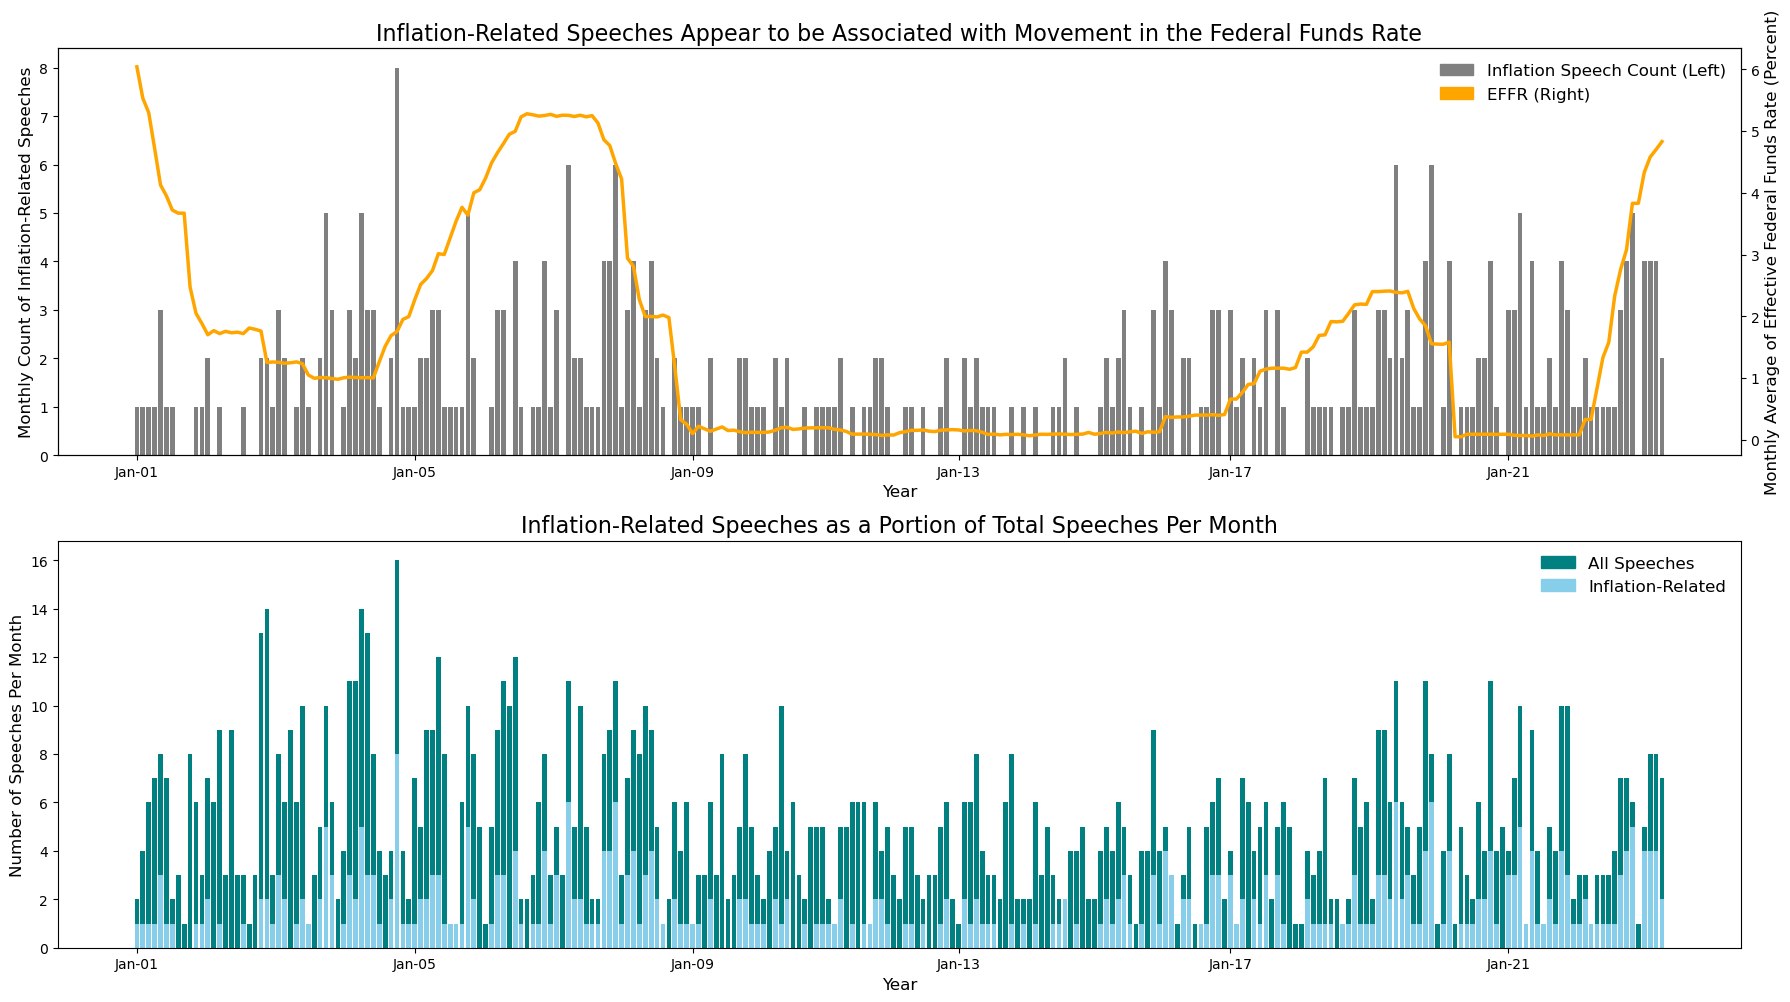

In [28]:
fig=plt.figure()#This uses matplotlib to create a figure to store our graphs
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(18,10))#Sets specifications for figure. It will have one column and two rows. I adjusted figsize after viewing the output graphs


ax1=plt.subplot(2,1,1)#This tells Python that the graphs will have 2 rows and 1 column. This graph, "ax1" will be kept in index position 1 of the figure
ax1.bar(final['Date'],final['Inflation_Related'],color='grey')#This will plot a bar graph with a count of inflation related speeches on the y axis and year on the x axis

ax2=ax1.twinx()#The twinx() function allows us to plot another graph above our "ax1"
ax2.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)#This will show a line graph of the EFFR over time

ax1.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])
#The x ticks are set to the above dates and given the respective labels for each date

ax1.set_ylabel('Monthly Count of Inflation-Related Speeches', fontsize=12)#This will set the y-axis title on the left hand side, referring to inflation speeches
ax2.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)#This will set the y-axis on the right hand side referring to EFFR
ax1.set_title('Inflation-Related Speeches Appear to be Associated with Movement in the Federal Funds Rate', fontsize=16)#This will set the main title for our first graph within the figure
ax1.set_xlabel('Year', fontsize=12)#This titles the x-axis for our first graph of the figure

inflationspeech=mpatches.Patch(color='grey', label='Inflation Speech Count (Left)')#This portion manually creates a legend patch, by specifying the color that corresponds to the graphed information, as well as its respective label
effr=mpatches.Patch(color='orange', label='EFFR (Right)')#I learned how to manually create legends during our Weekly Task 5 at https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
plt.legend(handles=[inflationspeech,effr], frameon=False, fontsize=12)#This sets the legend by applying a list of the created patch information under the argument "handles". I learned how to remvove the legend's border by setting "frameon" to False through https://www.tutorialspoint.com/remove-or-adapt-the-border-of-the-frame-of-legend-using-matplotlib

ax3=plt.subplot(2,1,2)#Similar to above, this states the subplot will have 2 rows and 1 column. This subplot will be stored in index position 2
ax3.bar(final['Date'],final['Total'],color='teal')#This will plot total count of monthly speeches along the y-axis and "Year" along the x-axis
ax3.bar(final['Date'],final['Inflation_Related'],color='skyblue')#This will overlay total inflation speeches for each month, on the same plot

ax3.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])
#X-ticks are set with the respective date labels

ax3.set_xlabel('Year', fontsize=12)#This will set the x-axis title
ax3.set_ylabel('Number of Speeches Per Month', fontsize=12)#This will set the y-axis title corresponding to total monthly speeches
ax3.set_title('Inflation-Related Speeches as a Portion of Total Speeches Per Month', fontsize=16)#This will set the main title of this subplot graph

fig.tight_layout()#Tight layout makes adjustments to the placement of items in the figure. I think it makes it look more neat

total=mpatches.Patch(color='teal', label='All Speeches')#This portion will also manually set a legend but for the second graph
inflation=mpatches.Patch(color='skyblue', label='Inflation-Related')
plt.legend(handles=[total,inflation], frameon=False, fontsize=12)#One patch refers to inflation speeches and the other to total. Each are colored to match the bar graph, the legend's frame was turned off

plt.savefig(path+'firstfig.png', dpi=300)#This will save the figure as a png file to the spsecified path

### After normalizing for the number of speeches given each month the above relationship becomes less stark. I wonder, do these graphs suggest that rather than there being a relationship between inflation speeches and the FFR, it is instead between total speeches and the FFR. Could it show that as the FFR rises, officials speak to the public more and vice-versa? This would be interesting especially as I feel it is usually assumed that officials do the opposite and speak more during downturns when the FFR is already low and they are running out of tools. However, when including a variable for count of total monthly speeches in my regression, it was not statistically significant. Maybe this rules it out.
# 

## Second Plot (Documented)

<Figure size 640x480 with 0 Axes>

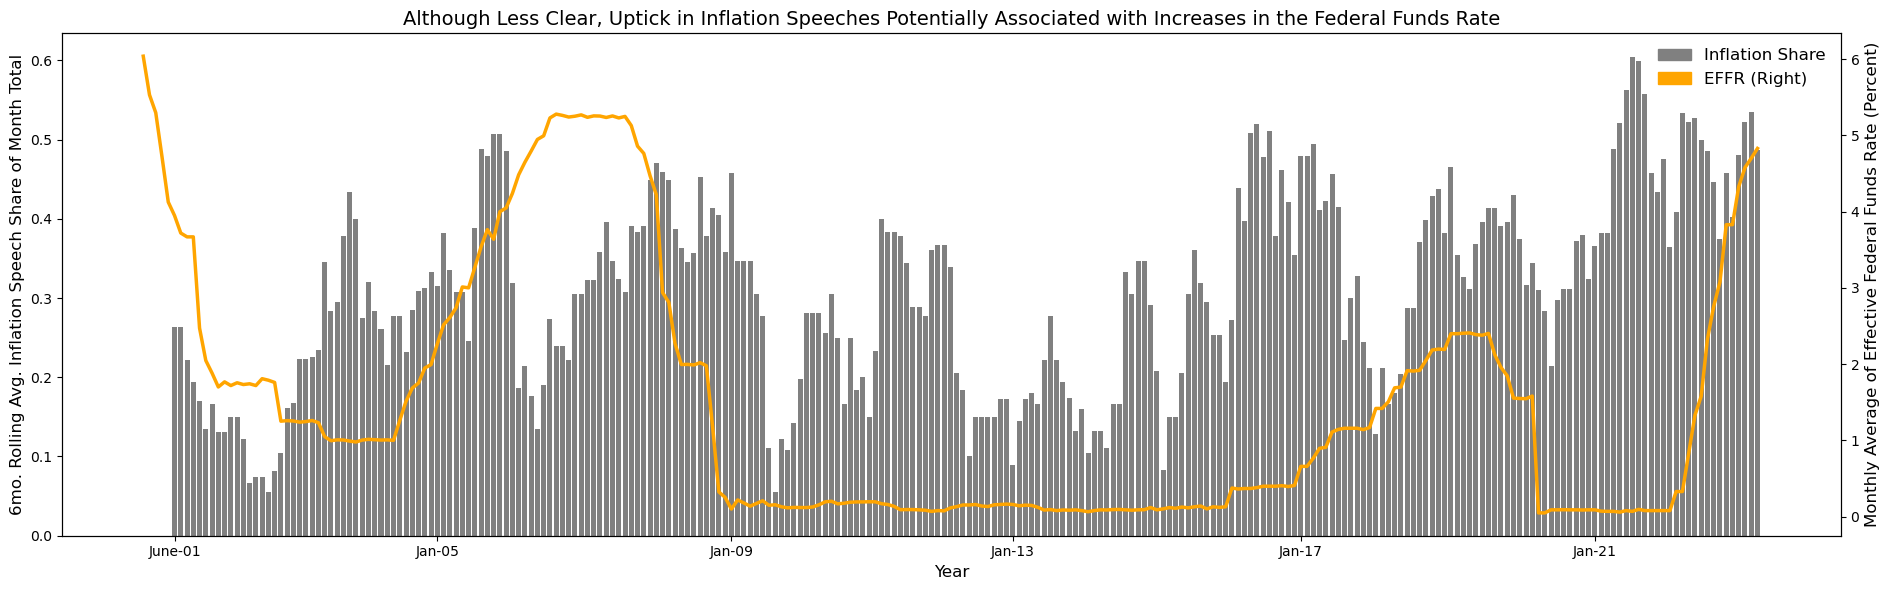

In [29]:
fig=plt.figure()#Created a figure to store our graph
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(19,6))#This figure will only have one row and one column, just one spot for our graph

final['InflationShare_Average']=final.rolling(window=6)['Inflation_Share'].mean()
#A new column will be made to the "final" dataset, adding a rolling average of the share of inflation speeches per month
#The 6 month moving average was chosen to smooth the data to help show a clearer relationship, if it exists

ax4=plt.subplot(1,1,1)#This states the graph will be in index position 1 out of our 1 column and 1 row
ax4.bar(final['Date'],final['InflationShare_Average'],color='grey')#This will plot the moving average inflation share for each month

ax5=ax4.twinx()#Similar to above, twinx() will be used to allow us to plot the EFFR data on top of this bar graph, they will share the same x-axis but have their own y-axis
ax5.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)#This places the EFFR line plot on top of the bar plot

ax4.set_xticks(['2001-06-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['June-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])#This will manually set the xticks in the location specified as the first argument. The labels for each date are located in the list in the second argument
#x-ticks are set for each date and given their respective labels

ax4.set_ylabel('6mo. Rolling Avg. Inflation Speech Share of Month Total', fontsize=12)#This will set the y-axis title on the left hand side for the share of inflation related speeches
ax5.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)#This will set the y-axis label on the right hand side for the EFFR data
ax4.set_title('Although Less Clear, Uptick in Inflation Speeches Potentially Associated with Increases in the Federal Funds Rate', fontsize=14)#This sets tha main title for the plot
ax4.set_xlabel('Year', fontsize=12)#This will set the x-axis title for "Year"

fig.tight_layout()#fig.tight_layout() is used again to make the plot more neat, although I don't know if it has as much of an impact when the plot only has one graph as opposed to two

inflationshare=mpatches.Patch(color='grey', label='Inflation Share')#This portion manually creates a legend patch, by specifying the color that corresponds to the graphed information, as well as its respective label
effr=mpatches.Patch(color='orange', label='EFFR (Right)')#I learned how to manually create legends during our Weekly Task 5 at https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
plt.legend(handles=[inflationshare,effr], frameon=False, fontsize=12)#This sets the legend by applying a list of the created patch information under the argument "handles". I learned how to remvove the legend's border by setting "frameon" to False through https://www.tutorialspoint.com/remove-or-adapt-the-border-of-the-frame-of-legend-using-matplotlib

plt.savefig(path+'secondfig.png', dpi=300)#This will save the plot as a png file with 300 dpi for sharper quality, while keeping the file relatively small

### This graph concerned me at first. After normalizing for the number of speeches each month, the relationship between inflation speeches and the FFR seems less clear than in the prior graph. But, I did notice a slight drop around the middle periods that may have been during a recession. Could this still show a small relationship? I think regardless of any relationship between the two, the way I gather and assume a speech's topic is crude and may lead to innacurate results.
# 

## Third Plot (Documented)

<Figure size 640x480 with 0 Axes>

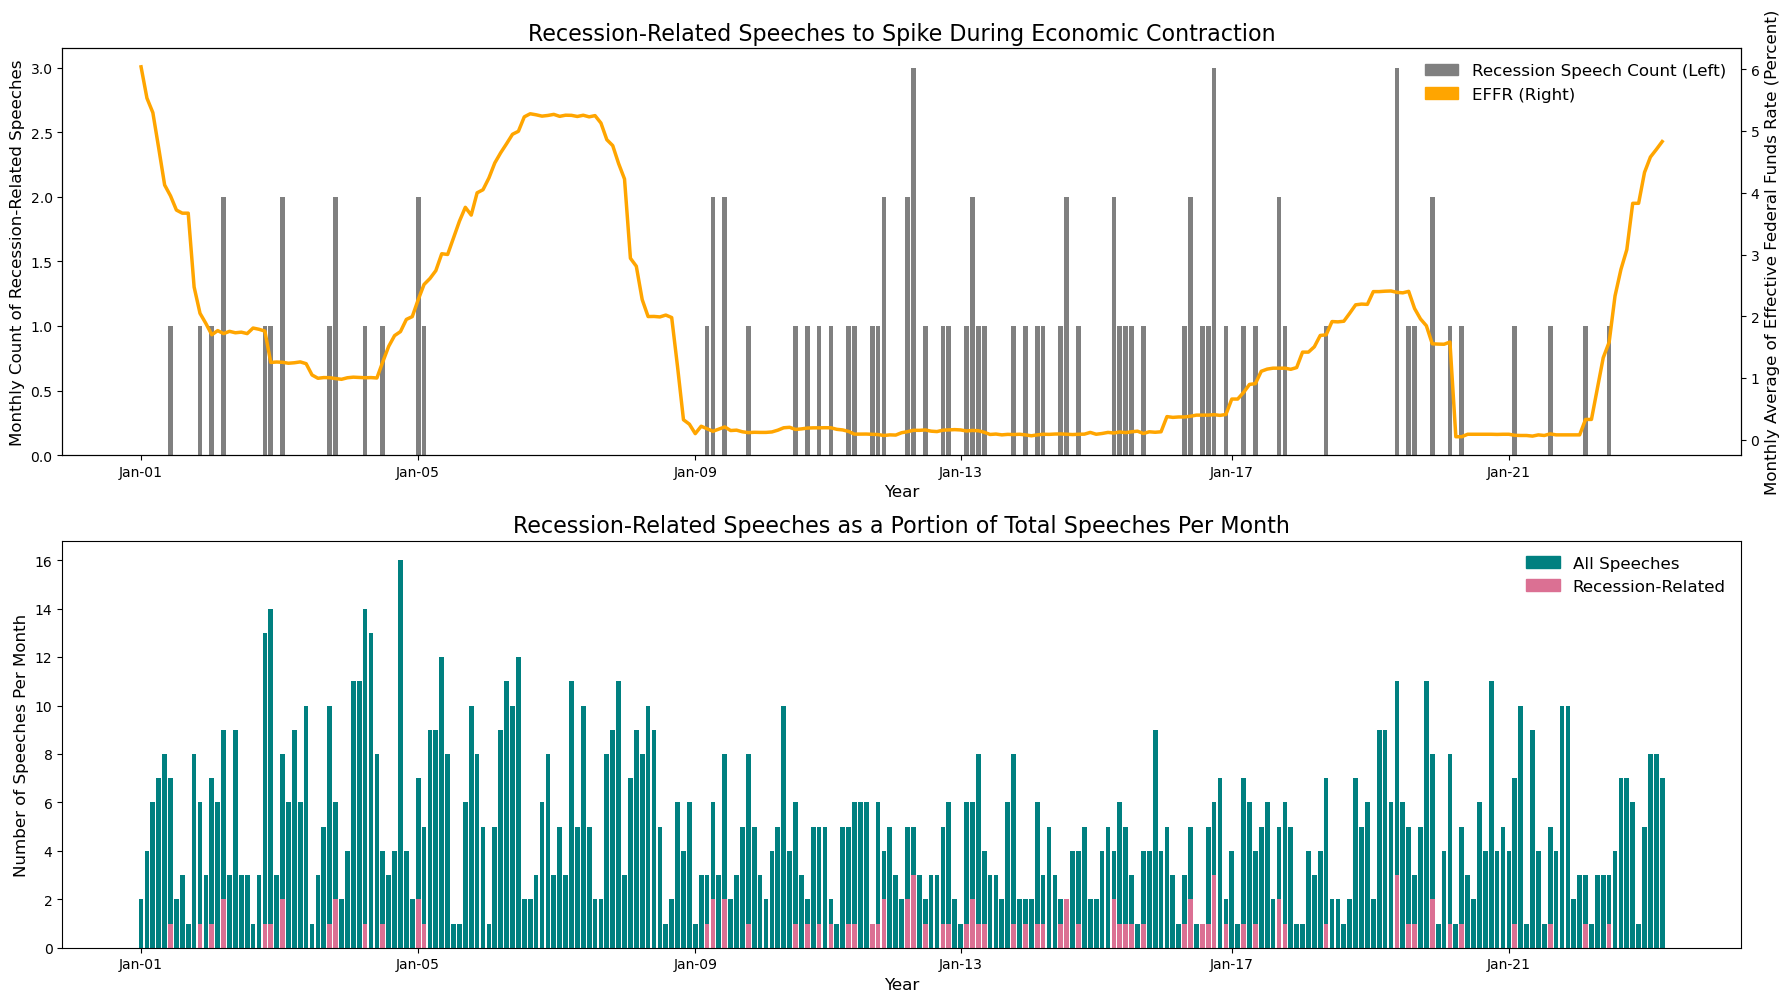

In [30]:
#This plot is the same format as the first, with minimal changes in order to represent data on recession speeches

fig=plt.figure()#This will create the figure to store our plots
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(18,10))#This creates the plot wil 1 column and 1 row


ax1=plt.subplot(2,1,1)#The first graph will be in index position 1 of the plot
ax1.bar(final['Date'],final['Recession_Related'],color='grey')#Data plotted will be recession related speeches along the y-axis with the Date along the y-axis

ax2=ax1.twinx()#Tiwnx() will be used again to overlay the EFFR line plot
ax2.plot(final['Date'],final['EFFR'],color='orange',linewidth=2.5)#EFFR data will be plotted and shrare the same x-axis as the speech data. They will however have their own y-axes

ax1.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])
#x-ticks will be set based on date and will be given the respective labels

ax1.set_ylabel('Monthly Count of Recession-Related Speeches', fontsize=12)#This sets the left hand side y-axis title for the speech data
ax2.set_ylabel('Monthly Average of Effective Federal Funds Rate (Percent)', fontsize=12)#This sets the right hand side y-axis for EFFR data
ax1.set_title('Recession-Related Speeches to Spike During Economic Contraction', fontsize=16)#This will set the title of the first graph in the figure
ax1.set_xlabel('Year', fontsize=12)#This will set the title of the x-axis

inflationspeech=mpatches.Patch(color='grey', label='Recession Speech Count (Left)')#This portion manually creates a legend patch, by specifying the color that corresponds to the graphed information, as well as its respective label
effr=mpatches.Patch(color='orange', label='EFFR (Right)')#I learned how to manually create legends during our Weekly Task 5 at https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
plt.legend(handles=[inflationspeech,effr], frameon=False, fontsize=12)#This sets the legend by applying a list of the created patch information under the argument "handles". I learned how to remvove the legend's border by setting "frameon" to False through https://www.tutorialspoint.com/remove-or-adapt-the-border-of-the-frame-of-legend-using-matplotlib

ax3=plt.subplot(2,1,2)#The second plot will be in index position 2 of the figure
ax3.bar(final['Date'],final['Total'],color='teal')#It will replicate the above plot but instead overlay recession speeches above the total monthly speech count bar graph
ax3.bar(final['Date'],final['Recession_Related'],color='palevioletred')#This will plot the recession related speeches in relation to total speeches placed behind the total speech count bars

ax3.set_xticks(['2001-01-01','2005-01-01','2009-01-01','2013-01-01','2017-01-01','2021-01-01'],['Jan-01','Jan-05','Jan-09','Jan-13','Jan-17','Jan-21'])
#This sets the x-ticks in the same way with their labels

ax3.set_xlabel('Year', fontsize=12)#This will refer to the x-axis title
ax3.set_ylabel('Number of Speeches Per Month', fontsize=12)#This refers to the y-axis title
ax3.set_title('Recession-Related Speeches as a Portion of Total Speeches Per Month', fontsize=16)#This titles the entire second graph


total=mpatches.Patch(color='teal', label='All Speeches')#This will manually create the legends
recession=mpatches.Patch(color='palevioletred', label='Recession-Related')
plt.legend(handles=[total,recession], frameon=False, fontsize=12)#Legend is plotted without borders


fig.tight_layout()#Tight_layout() to keep neat

plt.savefig(path+'thirdfig.png', dpi=300)#Graphs are saved as one figure in png format

### I wanted to include this despite large gaps in the data. Could it show that recession speech topics are less common during expansions? There appears to be a spike in such speeches when the FFR is low, I am assuming these periods were during downturns. I think the botton graph is interesting as well. In comparison to the inflation speeches, we see how inflation appears to be a year round topic. This doesn't seem so when it comes to other topics such as recession related speeches.
# 

<Figure size 640x480 with 0 Axes>

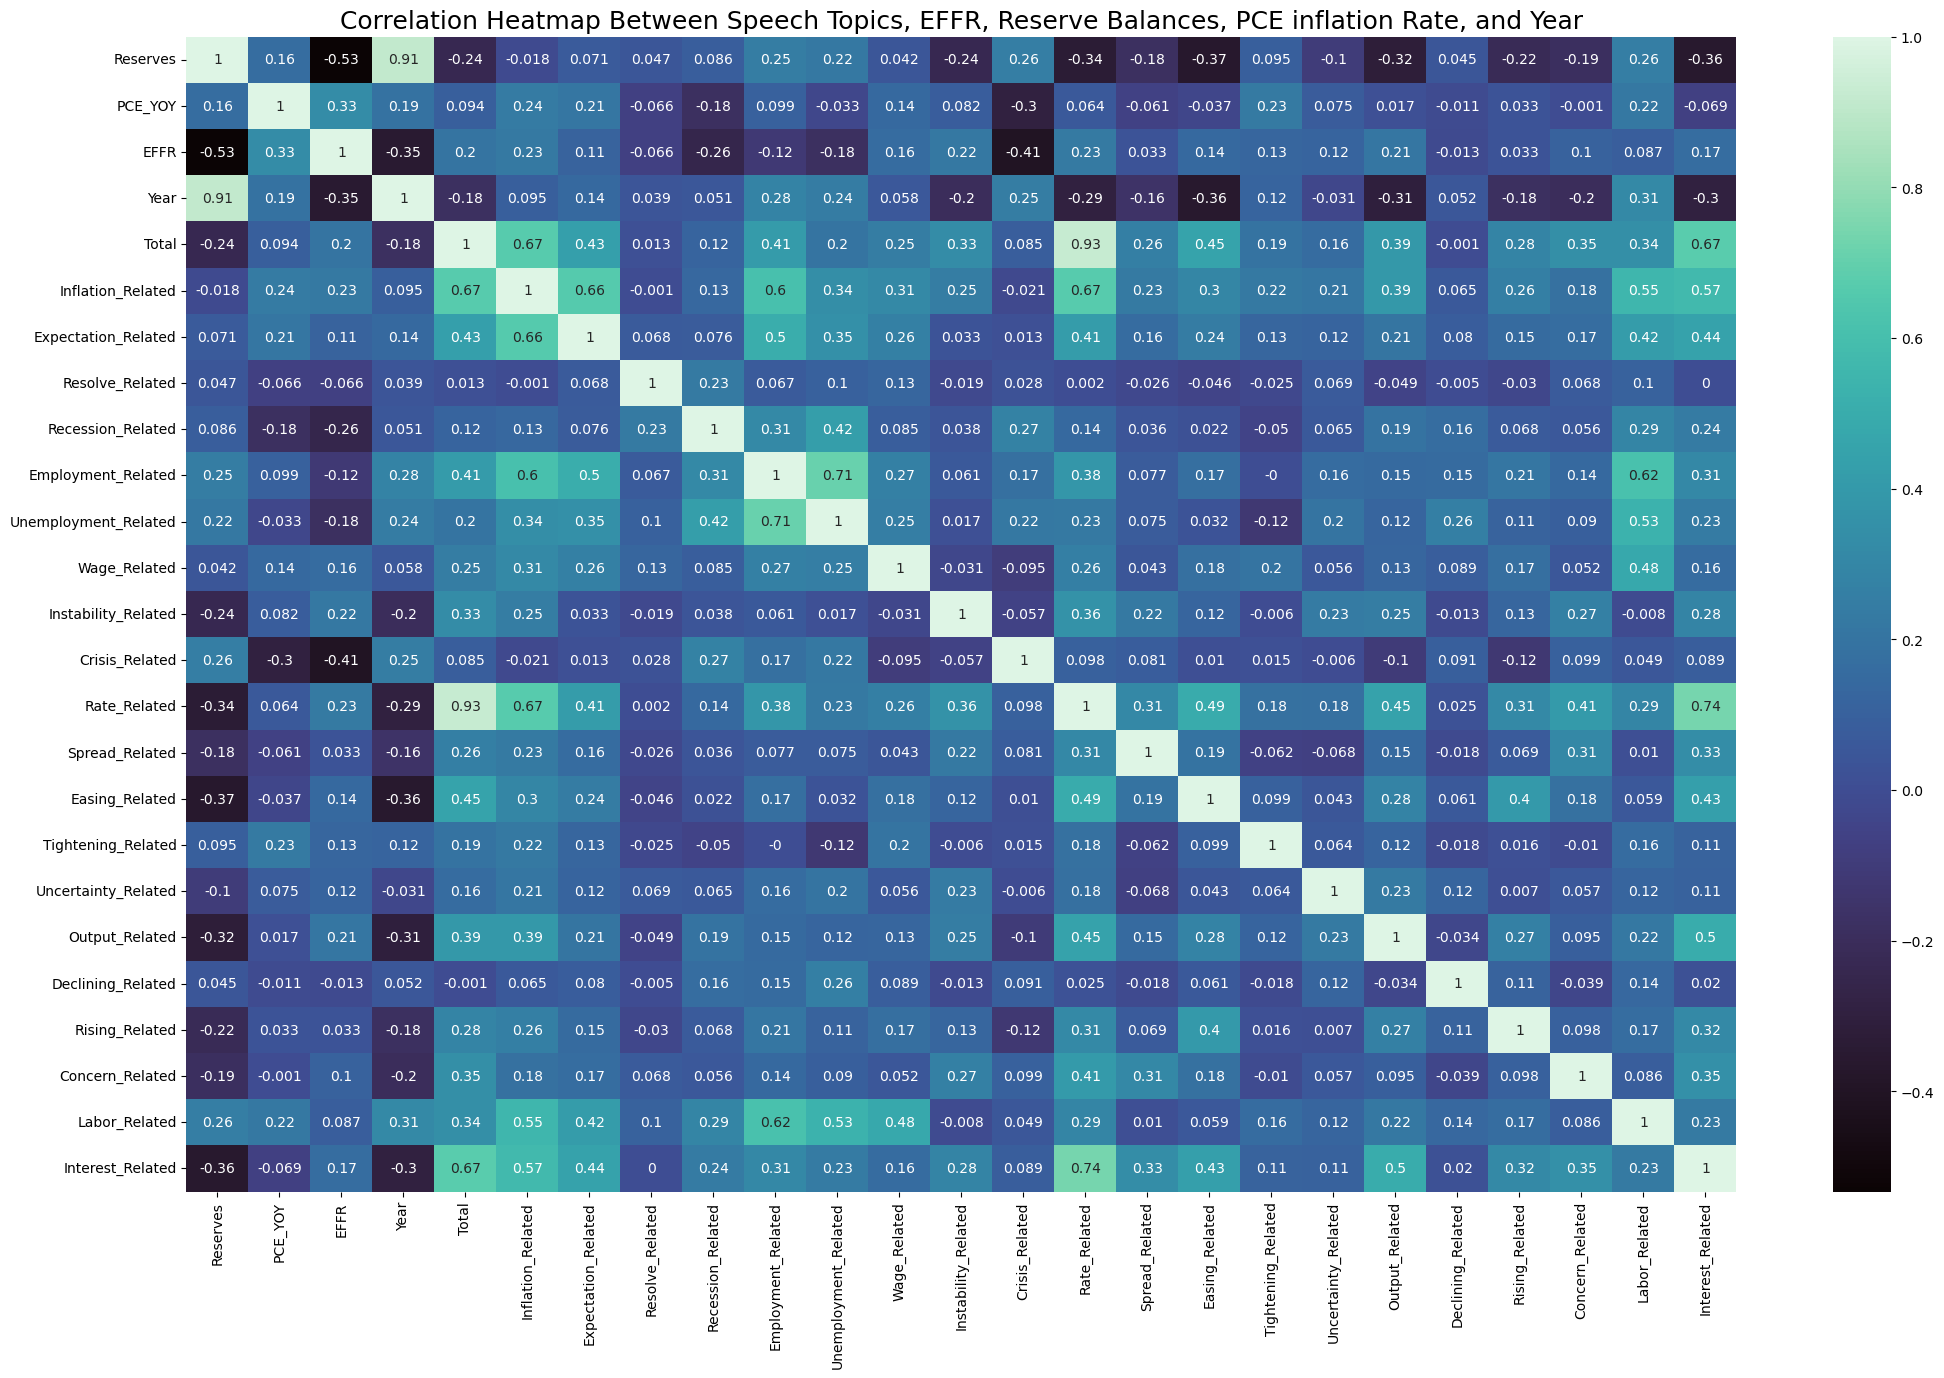

In [31]:
heat=pd.read_csv(path+'speechfinal.csv')#I will read in the main dataset under a new name because I chose to remove columns from this plot

heat=heat.drop(columns=['Unnamed: 0','Day','Month','Optimism_Related','Inflation_Share','Expectation_Share','Resolve_Share','Optimism_Share','Recession_Share','Employment_Share','Unemployment_Share','Wage_Share','Instability_Share','Crisis_Share','Rate_Share','Spread_Share','Easing_Share','Tightening_Share','Uncertainty_Share','Output_Share','Declining_Share','Rising_Share','Concern_Share','Labor_Share','Interest_Share'])
#I will drop all keyword "Share" columns to shrink the plot

fig=plt.figure()#Creates a figure
fig, ax=plt.subplots(figsize=(25,15))#I believe adding no arguments for columns and rows keeps the plot with one spot only

correlation=sns.heatmap(round(heat.corr(),3), annot=True, cmap='mako')#The .corr() function is ran through sns's heatmap() function to create a heatmap based on each variable's correlation with one another
                                                                      #It will use a gradient palette found through https://seaborn.pydata.org/tutorial/color_palettes.html

correlation.set_title('Correlation Heatmap Between Speech Topics, EFFR, Reserve Balances, PCE inflation Rate, and Year', fontsize=18)#This will set the title of the entire plot

correlation.figure.savefig(path+'heatmap.png',dpi=300)#The heatmap will be saved as a png file

### I think this heatmap uncovers alot of interesting relationships. Like how inflation speeches are highly correlated with labor related speeches. Maybe this can be expected, but it is nice to have it shown through the data. It is also exciting when the effect of certain speech topics appear to fit my assumptions. Crisis related speeches likely have a heavier tone, and appear to be negatively correlated with the FFR. Maybe this shows that as talks of crisis rises the FFR goes down in response to a weaker economy?